# PROYECTO KAGGLE

In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


load train.csv data with pandas

In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


El archivo CSV llamado dataframe contiene 692,500 filas, es decir, tiene 692,500 registros u observaciones.
12 columnas: Cada registro tiene 12 atributos o variables.
Esto indica que el archivo train.csv contiene una gran cantidad de datos, con 692,500 ejemplos, cada uno descrito por 12 variables diferentes.

In [7]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Acá vemos las primeras 5 filas del dataframe z, es decir, una muestra de los datos cargados para inspeccionarlos, con sus respectivas columnas.

In [8]:
# Contar el número de estudiantes en cada programa académico
estudiantes_por_programa = z['ESTU_PRGM_ACADEMICO'].value_counts()

# Mostrar los resultados
print(estudiantes_por_programa)

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [9]:
# Contar el número de estudiantes por departamento/localidad
estudiantes_por_departamento = z['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Mostrar los resultados
print(estudiantes_por_departamento)

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [10]:
# Contar estudiantes agrupados por programa académico y departamento
estudiantes_por_programa_y_departamento = z.groupby(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']).size()

# Mostrar los resultados
print(estudiantes_por_programa_y_departamento)

ESTU_PRGM_ACADEMICO                             ESTU_PRGM_DEPARTAMENTO
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES  ANTIOQUIA                  69
ACTIVIDAD FISICA Y DEPORTE                      ANTIOQUIA                 162
ACUICULTURA                                     CORDOBA                    79
ADMINISTRACION                                  BOLIVAR                   100
                                                CESAR                      17
                                                                         ... 
ZOOTECNIA                                       NORTE SANTANDER           207
                                                RISARALDA                 127
                                                SANTANDER                  81
                                                SUCRE                     100
                                                VALLE                      82
Length: 2370, dtype: int64


In [11]:
# Contar estudiantes según las horas trabajadas por semana
estudiantes_por_horas_trabajadas = z['ESTU_HORASSEMANATRABAJA'].value_counts()

# Mostrar los resultados
print(estudiantes_por_horas_trabajadas)

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


In [12]:
# Crear una tabla cruzada de estudiantes por programa académico y estrato socioeconómico
tabla_cruzada = pd.crosstab(z['ESTU_PRGM_ACADEMICO'], z['FAMI_ESTRATOVIVIENDA'])

# Mostrar los resultados
print(tabla_cruzada)


FAMI_ESTRATOVIVIENDA                            Estrato 1  Estrato 2  \
ESTU_PRGM_ACADEMICO                                                    
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES          1         17   
ACTIVIDAD FISICA Y DEPORTE                              9         36   
ACUICULTURA                                            52         19   
ADMINISTRACION                                         10         22   
ADMINISTRACION  FINANCIERA                             14         14   
...                                                   ...        ...   
TRABAJO SOCIAL                                       3740       4653   
TRADUCCION INGLES-FRANCES-ESPAÑOL                       2         13   
TURISMO                                                34        113   
URBANISMO                                               0          0   
ZOOTECNIA                                             378        586   

FAMI_ESTRATOVIVIENDA                            Estrato 3  Estr

In [13]:
# Contar estudiantes por nivel de rendimiento global
rendimiento_estudiantes = z['RENDIMIENTO_GLOBAL'].value_counts()

# Mostrar los resultados
print(rendimiento_estudiantes)

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


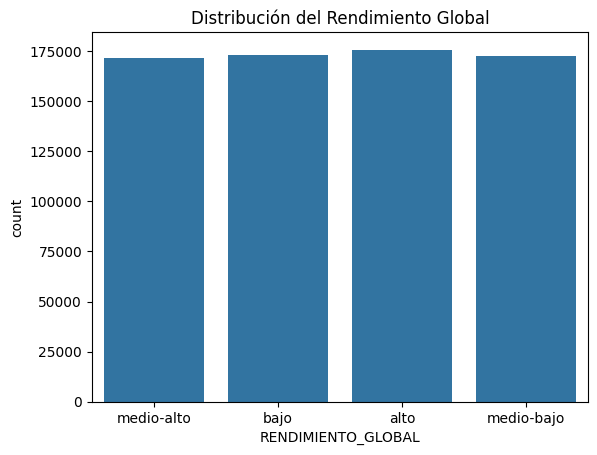

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para rendimiento global
sns.countplot(data=z, x='RENDIMIENTO_GLOBAL')
plt.title('Distribución del Rendimiento Global')
plt.show()

RENDIMIENTO_GLOBAL     alto   bajo  medio-alto  medio-bajo
FAMI_ESTRATOVIVIENDA                                      
Estrato 1             14363  42388       23643       31597
Estrato 2             45948  63068       59536       64119
Estrato 3             59121  42756       56841       51967
Estrato 4             28624   9064       16154       11672
Estrato 5             12415   2731        5112        3350
Estrato 6              7648   1287        2314        1356
Sin Estrato             588   1436         579         686


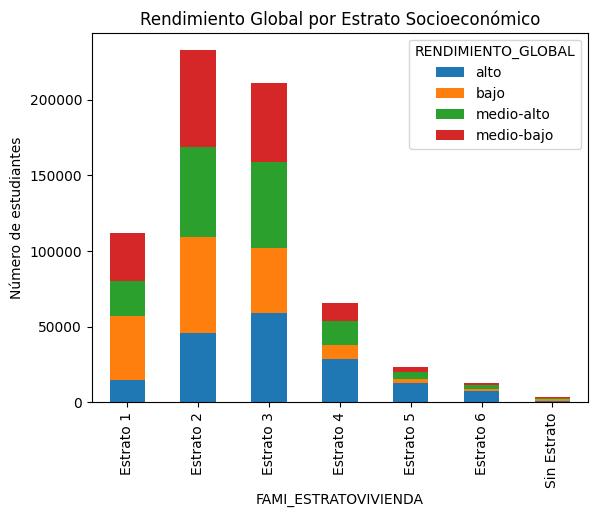

In [15]:
# Crear una tabla cruzada entre estrato socioeconómico y rendimiento global
rendimiento_por_estrato = pd.crosstab(z['FAMI_ESTRATOVIVIENDA'], z['RENDIMIENTO_GLOBAL'])

# Mostrar los resultados
print(rendimiento_por_estrato)

# Visualización del resultado
rendimiento_por_estrato.plot(kind='bar', stacked=True)
plt.title('Rendimiento Global por Estrato Socioeconómico')
plt.ylabel('Número de estudiantes')
plt.show()


RENDIMIENTO_GLOBAL        alto   bajo  medio-alto  medio-bajo
ESTU_HORASSEMANATRABAJA                                      
0                        45754  18959       28900       22937
Entre 11 y 20 horas      27554  32019       27400       28884
Entre 21 y 30 horas      20926  24483       22968       24316
Menos de 10 horas        23358  25434       18757       19642
Más de 30 horas          50989  62742       66102       69519


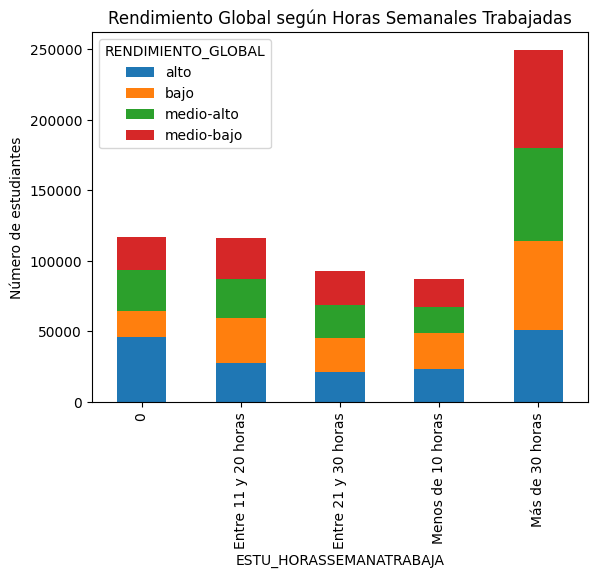

In [16]:
# Tabla cruzada entre horas trabajadas y rendimiento global
rendimiento_por_horas = pd.crosstab(z['ESTU_HORASSEMANATRABAJA'], z['RENDIMIENTO_GLOBAL'])

# Mostrar los resultados
print(rendimiento_por_horas)

# Visualización del resultado
rendimiento_por_horas.plot(kind='bar', stacked=True)
plt.title('Rendimiento Global según Horas Semanales Trabajadas')
plt.ylabel('Número de estudiantes')
plt.show()
